In [ ]:
#Chicago Public Health Dataset


In [66]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# Load the community area shapefile
community_areas = gpd.read_file('geo_export_c7c8d269-801a-422d-a09a-95a6aa6caed7.shp')

# Load the health data by community area
health_data = pd.read_csv('Public_Health_Statistics_-_Selected_public_health_indicators_by_Chicago_community_area_-_Historical.csv')


In [8]:
health_data = health_data.rename(columns = {"Community Area": "Community"})

community_areas = community_areas.rename(columns = {"area_num_1": "Community"})

In [12]:
health_data.columns

Index(['Community', 'Community Area Name', 'Birth Rate',
       'General Fertility Rate', 'Low Birth Weight',
       'Prenatal Care Beginning in First Trimester', 'Preterm Births',
       'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Colorectal Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Childhood Blood Lead Level Screening', 'Childhood Lead Poisoning',
       'Gonorrhea in Females', 'Gonorrhea in Males', 'Tuberculosis',
       'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment'],
      dtype='object')

In [37]:
top_3_homicides = health_data.nlargest(3, ['Assault (Homicide)'])
bottom_3_homicides = health_data.nsmallest(3, ['Assault (Homicide)'])


combined_top_bottom_3 = pd.concat([top_3_homicides, bottom_3_homicides], axis=0, ignore_index=False)

combined_top_bottom_3 = combined_top_bottom_3.set_index('Community Area Name')

combined_top_bottom_3 = combined_top_bottom_3[['Diabetes-related', 'Birth Rate', 'Infant Mortality Rate', 'Cancer (All Sites)', 'Firearm-related', 'Breast cancer in females']]

combined_top_bottom_3

,Diabetes-related,Birth Rate,Infant Mortality Rate,Cancer (All Sites),Firearm-related,Breast cancer in females
Community Area Name,,,,,,
Burnside,86.1,12.9,13.0,191.2,70.3,7.6
Greater Grand Crossing,92.3,18.2,14.2,274.4,44.6,29.1
Fuller Park,111.7,11.9,22.6,258.9,22.6,8.5
Edison Park,53.0,11.3,4.6,189.7,7.1,13.8
Lincoln Park,50.1,13.2,2.4,152.9,2.3,23.7
Loop,26.8,9.4,5.7,120.1,4.0,20.2


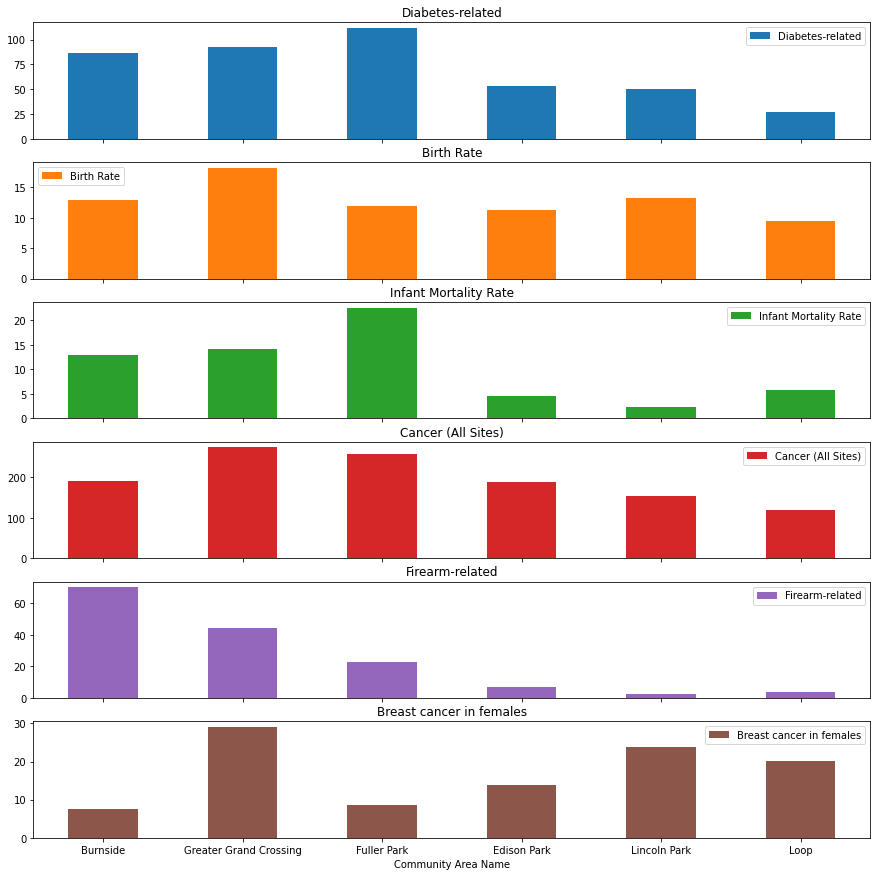

In [41]:
axes = combined_top_bottom_3.plot.bar(rot=0, subplots=True,figsize=(15, 15))
axes[1].legend(loc=2)

In [49]:
community_areas['Community'] = community_areas['Community'].astype(int) 
health_data['Community'] = health_data['Community'].astype(int) 

In [58]:
health_plot = health_data[['Community', 'Diabetes-related', 'Birth Rate', 'Infant Mortality Rate', 'Cancer (All Sites)', 'Firearm-related', 'Breast cancer in females']].copy()

In [59]:
# Merge the life expectancy data with the community area shapefile
community_areas_le = community_areas.merge(health_plot, on='Community', how='left')

In [ ]:
# Merge the life expectancy data with the community area shapefile
community_areas_life = community_areas.merge(life_expectancy, on='Community Area', how='left')

# Define the choropleth map
fig = px.choropleth_mapbox(community_areas_life,
                           geojson=community_areas_life.geometry.__geo_interface__,
                           locations=community_areas_life.index,
                           color='Life Expectancy',
                           color_continuous_scale='reds',
                           range_color=(60, 90),
                           opacity=0.5,
                           mapbox_style='carto-positron',
                           zoom=9.5,
                           center={'lat': 41.88, 'lon': -87.63},
                           hover_name='Community Area',
                           hover_data=['Life Expectancy'],
                           labels={'Life Expectancy': 'Life Expectancy (years)'})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()


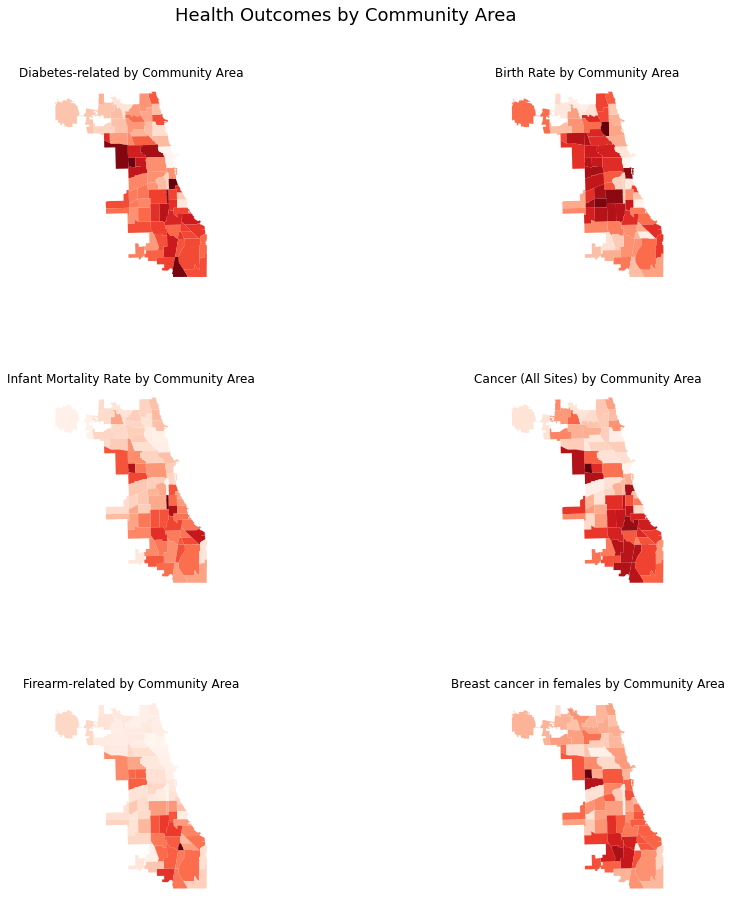

In [65]:
# Create the choropleth map
plotting_health_outcomes = ['Diabetes-related','Birth Rate', 'Infant Mortality Rate', 'Cancer (All Sites)', 'Firearm-related', 'Breast cancer in females']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Health Outcomes by Community Area", fontsize=18, y=0.95)

for i, ax in zip(plotting_health_outcomes, axs.ravel()):
    community_areas_le.plot(column=i, cmap='Reds', ax=ax)
    ax.set_title("{} by Community Area".format(i))
    ax.axis('off')
    ax.set_xlabel("")
plt.savefig('Health_Outcomes_By_Area.png', bbox_inches='tight')
plt.show()


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression


# Select the relevant columns
df = health_data[['Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment', 
       'Community Area Name', 'General Fertility Rate', 'Teen Birth Rate', 
         'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Childhood Lead Poisoning','Tuberculosis',]]




In [72]:
# Remove rows with missing data
df.dropna(inplace=True)


In [73]:
# Split the data into features and target
X = df.drop(['Community Area Name', 'Assault (Homicide)'], axis=1)
y = df['Assault (Homicide)']

In [75]:
# Use feature selection to select the top 3 features
selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(X, y)
top_features = X.columns[selector.get_support()]


In [76]:
# Perform linear regression on the top 3 features
regressor = LinearRegression()
regressor.fit(X[top_features], y)


LinearRegression()

In [77]:
# Print the coefficients of the top 3 features
print('Coefficients:', dict(zip(top_features, regressor.coef_)))

Coefficients: {'Unemployment': 0.8058722232916736, 'Infant Mortality Rate': 1.1185093826289316, 'Stroke (Cerebrovascular Disease)': 0.4034198162985467}
